## K-Nearest Neighbors (KNN) Classification on Iris Dataset



### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Set plot style
sns.set(style='whitegrid')

### 2. Load and Explore the Dataset

In [2]:
# Load the Iris dataset
iris = pd.read_csv('Iris.csv')

# Display the first five rows
display(iris.head())

# Check for missing values
print('Missing values in each column:')
print(iris.isnull().sum())

# Show basic statistics
display(iris.describe())

# Show class distribution
print('Class distribution:')
print(iris['Species'].value_counts())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Missing values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


### 3. Preprocess and Normalize Features

In [3]:
# Select features and target
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show first 5 rows of normalized features
pd.DataFrame(X_scaled, columns=X.columns).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### 4. Split Data into Training and Test Sets

In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 120
Test set size: 30


### 5. Train KNN Classifier with Different K Values

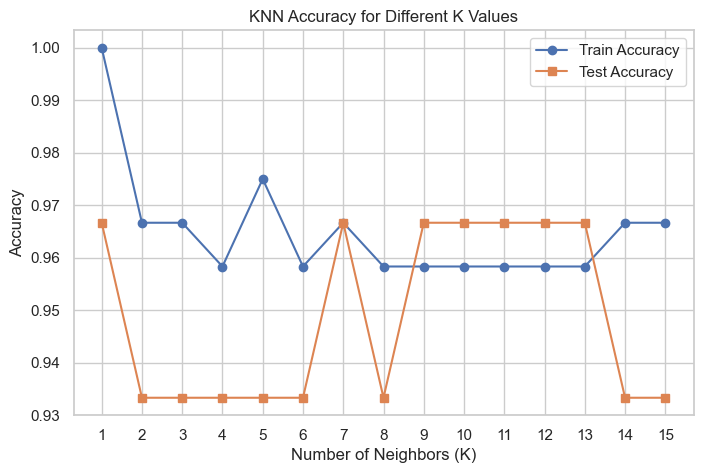

In [ ]:
# Train KNN with different values of K and store accuracy
k_range = range(1, 16)
train_accuracies = []
test_accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_range, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.legend()
plt.xticks(k_range)
plt.tight_layout()
plt.savefig('images/knn_accuracy_vs_k.png')
plt.show()

### 6. Evaluate Model Performance

In [6]:
# Select the best K (highest test accuracy)
best_k = k_range[np.argmax(test_accuracies)]
print(f'Best K: {best_k}')

# Retrain KNN with best K and evaluate
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Accuracy and classification report
acc = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {acc:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Best K: 1
Test Accuracy: 0.9667

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### 7. Visualize Confusion Matrix

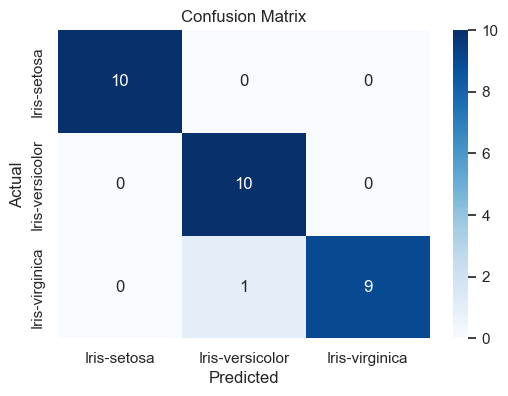

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn_best.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_best.classes_, yticklabels=knn_best.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('images/confusion_matrix.png')
plt.show()

### 8. Visualize Decision Boundaries (2D Projection)

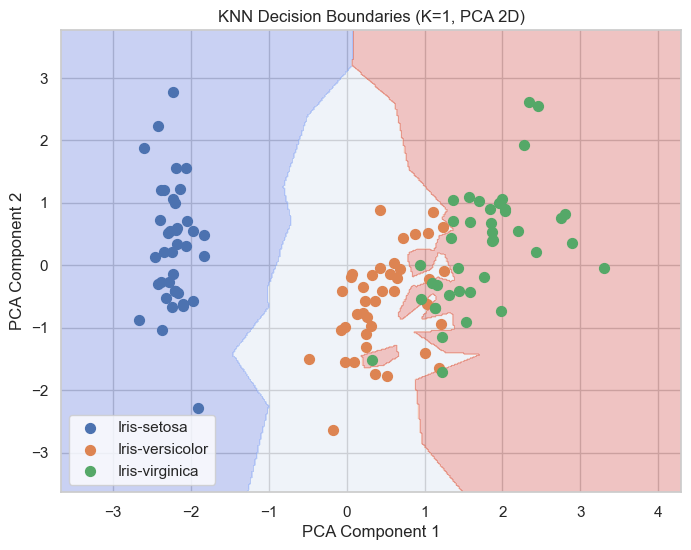

In [ ]:
# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Retrain KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train)

# Plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict and convert string labels to integer codes for contourf
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
from pandas.api.types import CategoricalDtype
cat_dtype = CategoricalDtype(categories=np.unique(y_train), ordered=True)
Z_int = pd.Series(Z, dtype=cat_dtype).cat.codes.values
Z_int = Z_int.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_int, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot training points
for species in np.unique(y_train):
    idx = np.where(y_train.values == species)
    plt.scatter(X_train_2d[idx, 0], X_train_2d[idx, 1], label=species, s=50)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'KNN Decision Boundaries (K={best_k}, PCA 2D)')
plt.legend()
plt.tight_layout()
plt.savefig('images/knn_decision_boundaries.png')
plt.show()